In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zetainspect.background import InflationHistory
from zetainspect.scales import Scales
from zetainspect.spectrum import Spectrum
from zetainspect.plotting import plot_quantity
import time

# define the inflationary history with eta transitions and a given tensor-to-scalar ratio
# instantiate the InflationHistory object with specified eta_list, efold_list, and r
hist = InflationHistory(eta_list=[-0.02, 3.6, -0.6, -0.08],
                        efold_list=[32.0, 30.4, 25.8],
                        r=1e-3)

# print the summary of the inflationary history
print(hist.summary())

InflationHistory summary
------------------------------------------------------------------------
Inputs
  r           = 0.001
  A_s         = 2.1e-09
  N_pivot     = 60
  k_pivot     = 0.05  [Mpc^-1]
  N_range     = [0.5, 65]  (before-end convention)

Phases
  n_phases    = 4
  eta_list    = [-0.02  3.6  -0.6  -0.08]
  efold_list  = [32.  30.4 25.8]

Pivot-derived
  H_pivot     = 3.21917e-06 [m_Planck]
  epsilon_pivot   = 6.25e-05
  eta_pivot   = -0.02
  n_s(pivot)  = 0.95975    (1 + 2η - 4ε)

Near end (N = 0.5)
  eta(end)    = -0.08
  epsilon(end)    = 2.7386e-05
  H(end)      = 3.20814e-06 [m_Planck]

Validity flags
  hierarchy_ok (eps < |eta|) = True
  inflation_ok (eps < 1)     = True
------------------------------------------------------------------------


In [2]:
N_arr = np.linspace(65, 0.5, int(1e4))

# compute the Hubble parameter and epsilon_H for the defined history
H_arr = hist.Hubble(N_arr)
eps_arr = hist.epsilon_H(N_arr)

print(f"Computed Hubble and epsilon arrays for {len(N_arr)} points.")
print(f"Hubble array: {H_arr[:5]} ... {H_arr[-5:]}")
print(f"epsilon_H array: {eps_arr[:5]} ... {eps_arr[-5:]}")

Computed Hubble and epsilon arrays for 10000 points.
Hubble array: [3.22008617e-06 3.22008511e-06 3.22008405e-06 3.22008298e-06
 3.22008192e-06] ... [3.20814717e-06 3.20814660e-06 3.20814604e-06 3.20814547e-06
 3.20814490e-06]
epsilon_H array: [5.11417020e-05 5.11549333e-05 5.11681681e-05 5.11814063e-05
 5.11946480e-05] ... [2.72731023e-05 2.73012751e-05 2.73294770e-05 2.73577081e-05
 2.73859683e-05]


In [3]:
# instantiate the Spectrum object to compute the power spectrum and related quantities for the defined history
spec = Spectrum(hist)

# compute the comoving wavenumber k(N) and the power spectrum P_zeta(N) for the defined history
vk = spec.vk(N_arr)

# compute the power spectrum P_zeta(N) for the defined history
pzeta = spec.power_spectrum(N_arr, ratio=0.005)

print(f"Computed vk array for {len(N_arr)} points.")
print("-------------------------------------------")
print(f"vk array: {vk[:5]} ... {vk[-5:]}")
print("")
print(f"Computed power spectrum array for {len(N_arr)} points.")
print("-------------------------------------------")
print(f"power spectrum array: {pzeta[:5]} ... {pzeta[-5:]}")

Computed vk array for 10000 points.
-------------------------------------------
vk array: [-3861.38120952+122871.01598394j -3848.94770749+122475.37594121j
 -3836.55424103+122081.00984973j -3824.20068123+121687.91360739j
 -3811.88689959+121296.08312528j] ... [-2.22026716e-10+1.75752219e-09j -2.21311780e-10+1.75186290e-09j
 -2.20599148e-10+1.74622183e-09j -2.19888811e-10+1.74059893e-09j
 -2.19180758e-10+1.73499413e-09j]

Computed power spectrum array for 10000 points.
-------------------------------------------
power spectrum array: [3.26932620e-09 3.26847843e-09 3.26763087e-09 3.26678353e-09
 3.26593641e-09] ... [1.26123985e-08 1.25993790e-08 1.25863730e-08 1.25733804e-08
 1.25604012e-08]


In [4]:
# instantiate the Scales object to for conversions between e-folds and comoving wavenumbers for the defined history
scale = Scales(hist)

# choose the number of e-folds N for which to compute the corresponding comoving wavenumber k which exits the horizon at that time
N_fixed = 30.0
# compute the corresponding comoving wavenumber k which exits the horizon at N_fixed
k_fixed = scale.k_horizon_exit(N_fixed)

print(f"Comoving wavenumber k at N={N_fixed} is approximately {k_fixed:.3e} [1/Mpc].")

Comoving wavenumber k at N=30.0 is approximately 5.326e+11 [1/Mpc].


In [5]:
# compute the value of P_zeta and vk for the comoving wavenumber k(N) for the defined history as a function of N

vk_evolve = spec.vk_track(N_arr, k_fixed)
pzeta_evolve = spec.power_spectrum_track(N_arr, k_fixed)
print(f"Computed vk evolution array for {len(N_arr)} points.")
print(f"vk evolution array: {vk_evolve[:5]} ... {vk_evolve[-5:]}")
print("-------------------------------------------")
print(f"Computed power spectrum evolution array for {len(N_arr)} points.")
print(f"power spectrum evolution array: {pzeta_evolve[:5]} ... {pzeta_evolve[-5:]}")

Computed vk evolution array for 10000 points.
vk evolution array: [ 8.13462268e-07+5.26403218e-07j  2.79418334e-07-9.27764304e-07j
  9.65772997e-07+7.81263551e-08j -8.14123554e-07-5.25379908e-07j
  1.47731379e-07-9.57599420e-07j] ... [-5.96962079e+08+1.16061618e+09j -6.01135339e+08+1.16872985e+09j
 -6.05337773e+08+1.17690024e+09j -6.09569586e+08+1.18512774e+09j
 -6.13830983e+08+1.19341277e+09j]
-------------------------------------------
Computed power spectrum evolution array for 10000 points.
power spectrum evolution array: [6.41361917e+21 6.32976904e+21 6.24701515e+21 6.16534316e+21
 6.08473893e+21] ... [0.00021742 0.00021742 0.00021742 0.00021742 0.00021742]


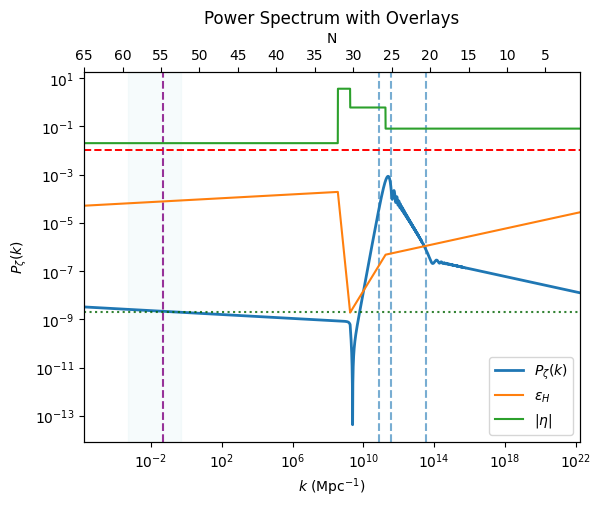

In [7]:
# plot

# create a plot of the power spectrum P_zeta(k) as a function of comoving wavenumber k
fig, ax = plot_quantity(
    spec,
    y="Pzeta", x="k", mode="ratio",
    N=N_arr,
    ratio=0.005,
    overlays=["pivot", "transitions", "As", "CMB", "PBH"],
    top_axis_N=True,
    lw=2.0,
    label=r"$P_\zeta (k)$",
)

# add additional plots of epsilon_H(k) and |eta(k)| on the same axes for comparison
plot_quantity(spec, y="epsilon", x="k", mode="ratio", N=N_arr, ratio=0.005, ax=ax, label=r"$\epsilon_H$")
plot_quantity(spec, y="abs_eta", x="k", mode="ratio", N=N_arr, ratio=0.005, ax=ax, label=r"$|\eta|$")

ax.set_ylabel(r"$P_\zeta (k)$")
ax.set_title("Power Spectrum with Overlays")
ax.legend()
plt.show()
